# デフェンシブ銘柄

In [1]:
import datetime
import re

import matplotlib.font_manager as fm
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
name_source = "デフェンシブ銘柄.xlsx"
df_code = pd.read_excel(name_source)
df_code

,コード,銘柄名
0,1301,極洋
1,1332,ニッスイ
2,1333,マルハニチロ
3,2002,日清粉Ｇ
4,2267,ヤクルト
...,...,...
63,9535,広ガス
64,9536,西部ガスＨＤ
65,9537,北陸ガス
66,9539,葉ガス


In [3]:
df_result = pd.DataFrame()
for code in df_code["コード"]:
    print(code)
    symbol = f"{code}.T"
    ticker = yf.Ticker(symbol)
    ser = ticker.history(period="1y")["Close"]
    df_result[code] = ser / ser.iloc[0]
df_result

1301
1332
1333
2002
2267
2282
2502
2503
2593
2802
2811
2871
2897
2914
4151
4502
4503
4506
4507
4519
4523
4528
4536
4568
9001
9003
9005
9006
9007
9008
9009
9010
9012
9020
9021
9022
9031
9033
9041
9042
9044
9045
9046
9048
9049
9052
9142
9433
9501
9502
9503
9504
9505
9506
9507
9508
9509
9511
9513
9531
9532
9533
9534
9535
9536
9537
9539
9543


,1301,1332,1333,2002,2267,2282,2502,2503,2593,2802,...,9513,9531,9532,9533,9534,9535,9536,9537,9539,9543
Date,,,,,,,,,,,,,,,,,,,,,
2024-06-04 00:00:00+09:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2024-06-05 00:00:00+09:00,1.002604,0.989372,0.984733,1.004771,0.998965,1.001661,1.006034,1.008152,1.003721,1.005634,...,0.988499,0.987381,1.000570,0.995165,0.970423,0.994751,0.992904,0.985316,1.000000,0.983420
2024-06-06 00:00:00+09:00,1.000000,0.987337,0.971298,1.005894,0.984814,0.998339,1.002586,1.005435,0.971292,1.019190,...,0.991033,0.995794,1.006845,1.001781,0.991549,1.000000,0.992904,0.985316,0.998205,0.978238
2024-06-07 00:00:00+09:00,0.997396,0.991973,0.972519,1.007297,0.982399,1.009138,1.004138,1.003170,0.974747,1.023944,...,0.984405,0.976444,1.001426,0.987532,0.984507,1.002625,0.992904,1.010279,0.994614,0.975130
2024-06-10 00:00:00+09:00,1.001302,1.002148,0.981679,1.010946,0.977394,1.012669,1.013793,1.004982,0.975811,1.038380,...,0.991423,1.004487,1.021392,1.018321,0.992958,1.005249,1.014698,1.008811,0.994614,0.982383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-29 00:00:00+09:00,1.153128,0.961251,0.964639,1.005155,1.016996,1.077260,0.993504,0.967069,0.851163,1.281338,...,0.982727,1.361379,1.070339,1.051223,0.804782,0.943101,0.940649,1.094244,1.387359,1.177558
2025-05-30 00:00:00+09:00,1.198558,0.969840,0.985801,1.007180,1.028625,1.084300,0.997166,0.971052,0.852510,1.271831,...,0.982930,1.385398,1.077379,1.045778,0.798971,0.937681,0.940122,1.091238,1.353144,1.181872
2025-06-02 00:00:00+09:00,1.195886,0.961251,0.980116,1.006312,1.027039,1.084726,0.994027,0.968709,0.853857,1.277113,...,0.978266,1.390259,1.080606,1.043184,0.798971,0.945811,0.948027,1.086728,1.366389,1.189420


### 日付文字列

In [4]:
dt_start = df_result.index[0]
date_str = f"{dt_start.year:04}-{dt_start.month:02}-{dt_start.day:02}"
row_last = len(df_result) - 1
dt_end = df_result.index[row_last]
date_latest_str = f"{dt_end.year:04}{dt_end.month:02}{dt_end.day:02}"
date_latest_str

'20250604'

In [9]:
df_top = df_result.iloc[row_last].sort_values(ascending=False)
n = 6
df_top.head(n)

4506    2.531792
4519    1.580536
9531    1.350227
9539    1.335485
9006    1.286575
2802    1.277465
Name: 2025-06-04 00:00:00+09:00, dtype: float64

In [10]:
list_top = list(df_top.index)
list_top

[4506,
 4519,
 9531,
 9539,
 9006,
 2802,
 1301,
 9543,
 9433,
 9142,
 9020,
 2282,
 4502,
 9532,
 9537,
 9045,
 2871,
 9007,
 9533,
 2267,
 9021,
 4507,
 4536,
 2002,
 2914,
 2502,
 9012,
 2503,
 9052,
 1333,
 1332,
 9513,
 9005,
 9535,
 9048,
 9042,
 4503,
 9536,
 9008,
 2593,
 9001,
 9003,
 9022,
 4151,
 9049,
 9031,
 9502,
 9041,
 9046,
 2811,
 9507,
 9511,
 9044,
 9033,
 9534,
 2897,
 9009,
 9508,
 4528,
 9506,
 4568,
 9010,
 9505,
 9504,
 4523,
 9503,
 9509,
 9501]

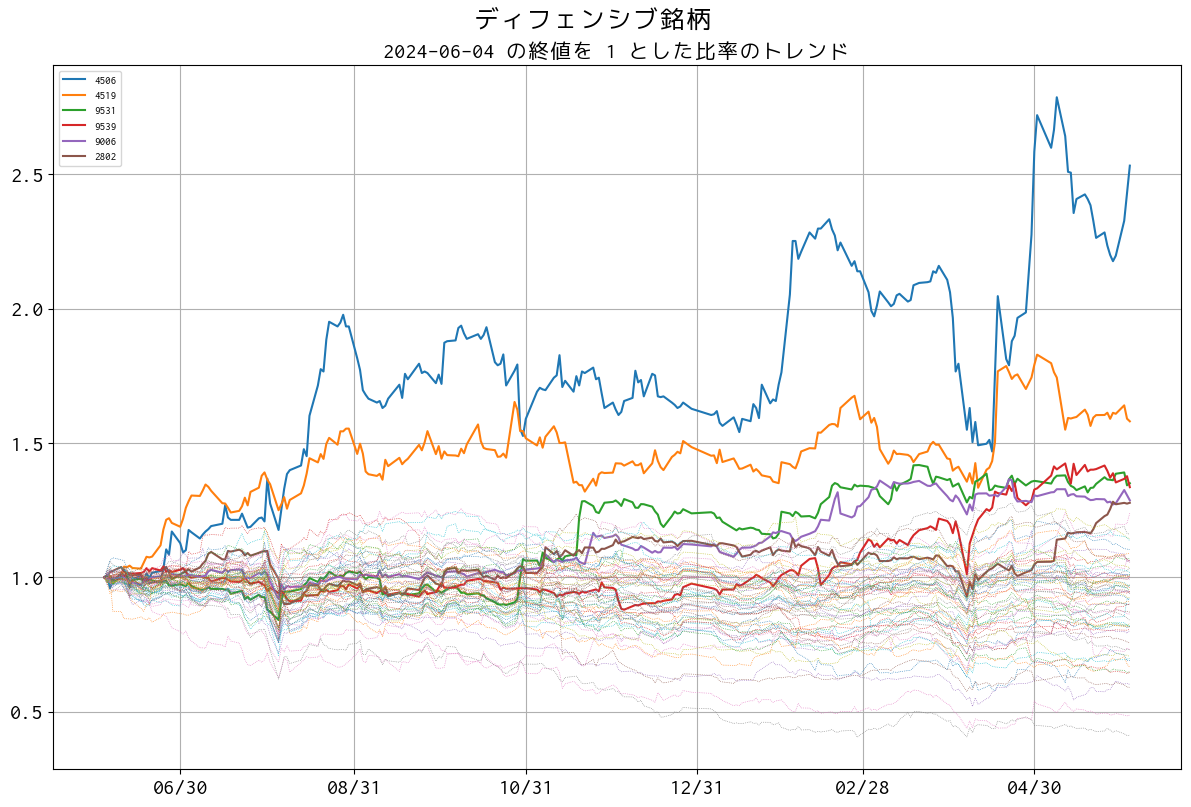

In [11]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["font.size"] = 16

fig, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(top=0.91, left=0.05, bottom=0.03, right=0.99)

for i, colname in enumerate(list_top):
    if i < n:
        width = 1.5
        lstyle = "solid"
        ax.plot(df_result[colname], lw=width, ls=lstyle, label=colname)
    else:
        width = 1
        lstyle = "dotted"
        ax.plot(df_result[colname], lw=width, ls=lstyle)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
fig.suptitle("ディフェンシブ銘柄")
ax.set_title(f"{date_str} の終値を 1 とした比率のトレンド", fontsize=16)
ax.grid()
ax.legend(loc='upper left', fontsize=8)
#plt.tight_layout()

plt.savefig(f"screenshots/{date_latest_str}_report_defensive.png")
plt.show()

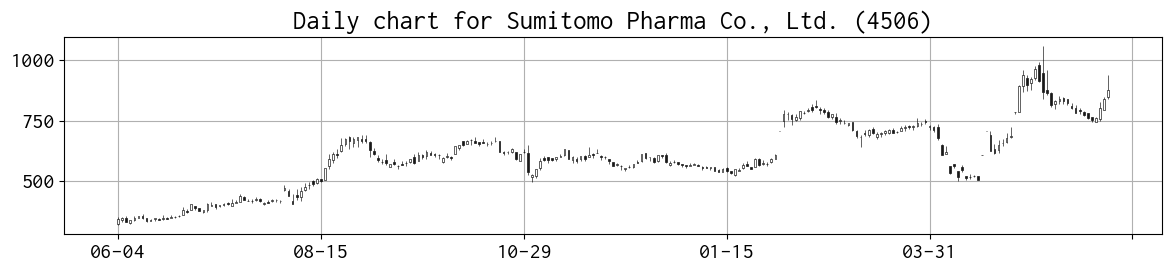

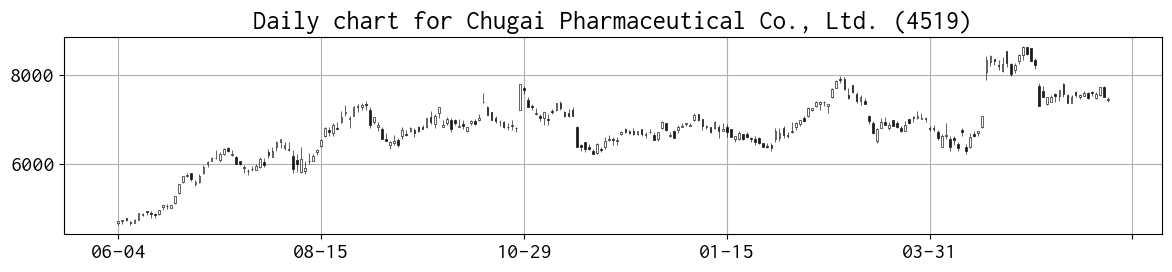

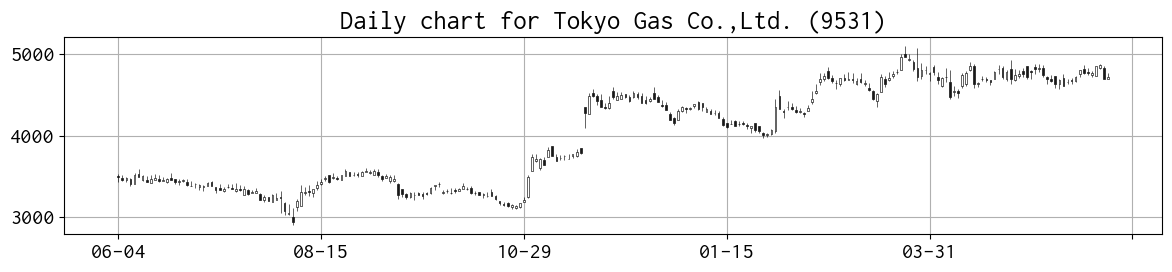

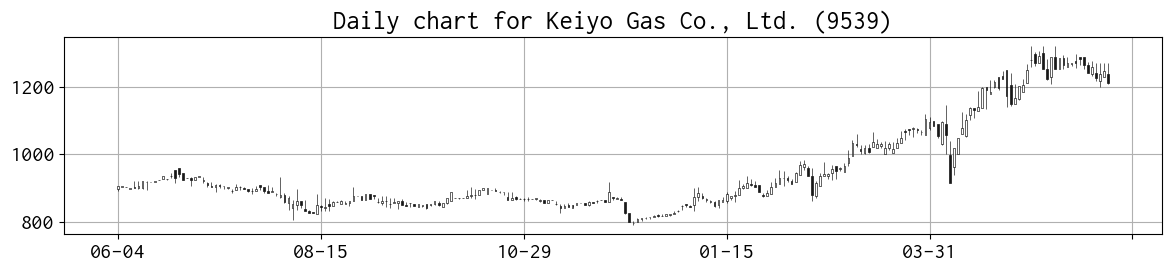

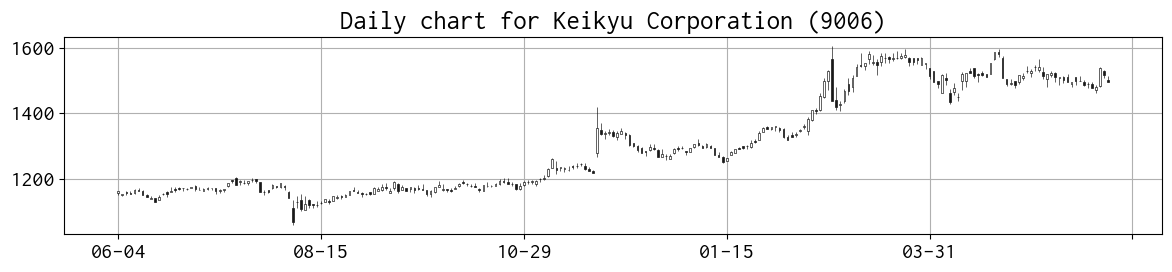

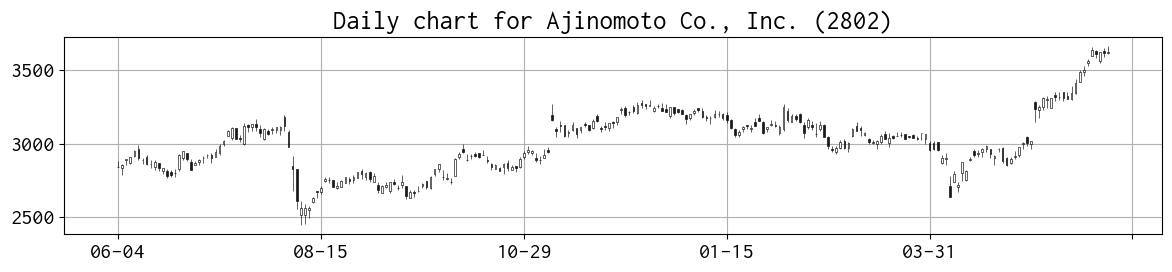

In [12]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["font.size"] = 16

for code in list_top[0:n]:
    symbol = f"{code}.T"
    ticker = yf.Ticker(symbol)
    df = ticker.history(period="1y")
    fig, ax = plt.subplots(figsize=(12, 3))
    mpf.plot(
        df,
        type='candle',
        style='default',
        volume=False,
        datetime_format='%m-%d',
        xrotation=0,
        ax=ax
    )
    ax.set_ylabel(None)
    ax.grid()
    ax.set_title(f"Daily chart for {ticker.info['longName']} ({code})")
    plt.tight_layout()
    plt.savefig(f"screenshots/{date_latest_str}_daily_chart_{code}.png")
    plt.show()